# 🧩 Fase 6 – Visualización de Datos 

## 1️⃣ Librerías necesarias
Ejecuta esto en tu entorno virtual si aún no las tienes instaladas: matplotlib seaborn pandas pymongo

In [1]:
pip install matplotlib seaborn pandas pymongo

Note: you may need to restart the kernel to use updated packages.



## 1️⃣ Cargar datos limpios desde la carpeta "database"

In [6]:
# visualizar_datos
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🔹 Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# 🔹 Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))  # Omitimos el campo _id
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")

# 🔹 Crear carpeta para guardar gráficos
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

# 🔹 Vista previa
print("Vista previa de los datos:\n")
print(df.head())

✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 3000

Vista previa de los datos:

  id_paciente          nombre  edad sexo      distrito      servicio  \
0       P0001  Carlos Ramírez    54    F        Callao   Cardiología   
1       P0002     Lucía Pérez    90    F  Sin distrito   Ginecología   
2       P0003     Carlos Díaz    59    M    San Isidro  Dermatología   
3       P0004  Andrés Cabrera    60    M         Lince  Dermatología   
4       P0005      Luis Rojas    51    M  Sin distrito     Pediatría   

  fecha_atencion       monto  
0     2021-09-04  366.000000  
1     2022-04-05  251.000000  
2     2024-12-21  387.000000  
3     2020-06-05  160.000000  
4     2025-06-06  278.289021  


## 2️⃣ GRÁFICO DE BARRAS: Número de pacientes atendidos por servicio

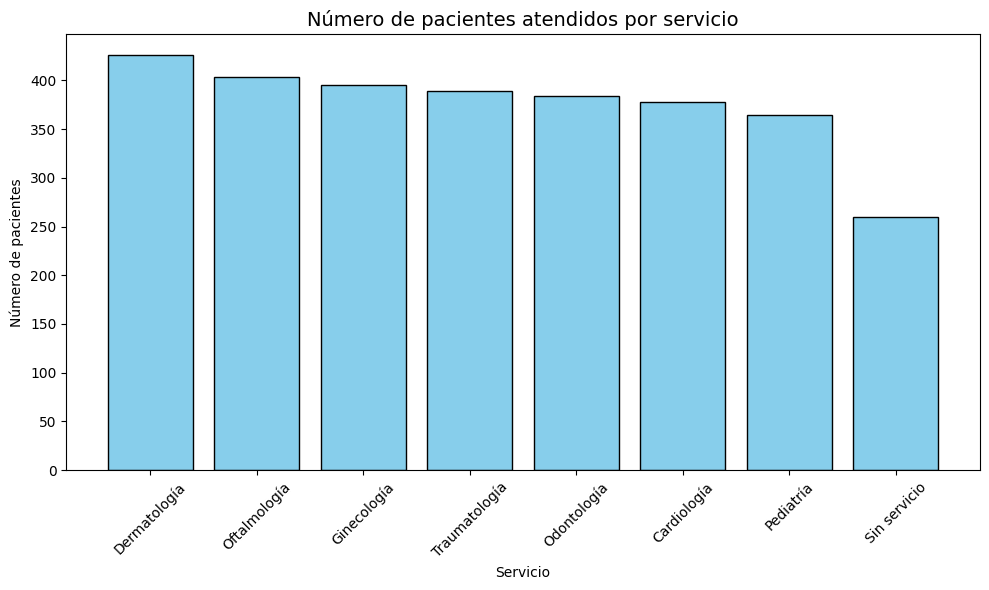

In [7]:
servicio_counts = df["servicio"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(servicio_counts.index, servicio_counts.values, color="skyblue", edgecolor="black")
plt.title("Número de pacientes atendidos por servicio", fontsize=14)
plt.xlabel("Servicio")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(reports_path / "Grafico_pacientes_atendidos.png")
plt.show()

## 3️⃣ GRÁFICO CIRCULAR: Distribución por sexo

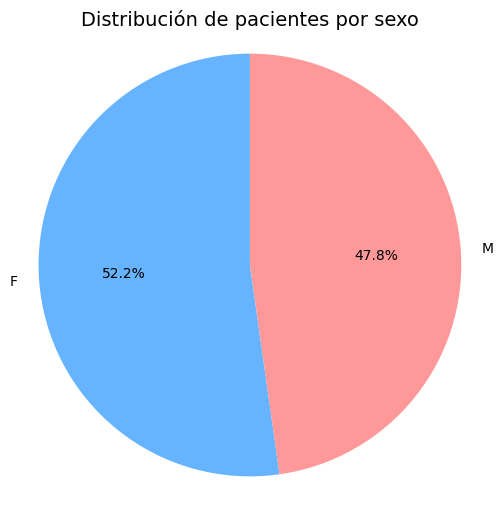

In [8]:

sexo_counts = df["sexo"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Distribución de pacientes por sexo", fontsize=14)
plt.axis("equal")
plt.savefig(reports_path / "Grafico_distribucion_sexo.png")
plt.show()

## 4️⃣ HISTOGRAMA: Distribución de edades

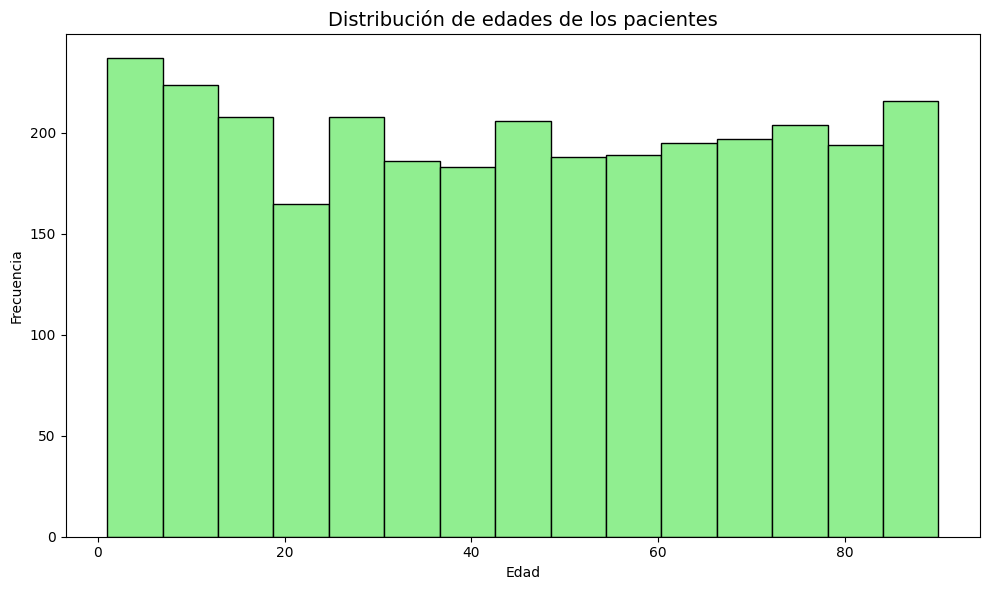

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df["edad"], bins=15, color="lightgreen", edgecolor="black")
plt.title("Distribución de edades de los pacientes", fontsize=14)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig(reports_path / "Grafico_distribucion_edad.png")
plt.show()


## 5️⃣ REPORTE TABULAR: Promedio de montos por distrito

In [10]:
reporte_distrito = df.groupby("distrito")["monto"].mean().reset_index().sort_values(by="monto", ascending=False)
reporte_distrito.rename(columns={"monto": "Promedio_Monto"}, inplace=True)

print("\n📋 REPORTE TABULAR: Promedio de montos por distrito")
print(reporte_distrito.to_string(index=False))


📋 REPORTE TABULAR: Promedio de montos por distrito
    distrito  Promedio_Monto
  Miraflores      293.015807
       Surco      286.653196
       Lince      281.573301
      Callao      279.442164
   Cajamarca      278.722231
   La Molina      275.494386
 Jesús María      273.254936
  San Isidro      269.253986
Sin distrito      264.982434
